In [72]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy.optimize as opt
%matplotlib inline

In [14]:
col0=[]
col1=[]
f=open('1-python-tutorial-pulse-NMR-T2-data.txt','r')

for line in f.readlines()[1:]:
    line = line.strip().split()
    c0 = float(line[0])
    c1 = float(line[1])
    
    col0.append(c0)
    col1.append(c1)

In [31]:
amplitude = np.asarray(col0)
time = np.asarray(col1)

In [23]:
h = np.polyfit(col0,np.log(col1),1)
h

array([-528.69247975,   -5.15995288])

In [48]:
def func(x, a, b,c):
    return a* np.exp(x*-b) + c

In [63]:
err = 0.05 * time
popt, pcov = curve_fit(func, amplitude, time, sigma = err, p0=[0.004,-1,0])
print(popt)
print(pcov)

[5.92872164e-03 8.61289877e+02 4.67588310e-04]
[[5.98899745e-08 8.39067640e-03 9.92318430e-10]
 [8.39067640e-03 4.16014603e+03 2.75570255e-03]
 [9.92318430e-10 2.75570255e-03 3.95317933e-09]]


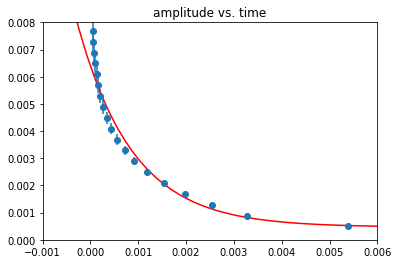

In [64]:
plt.errorbar(col0,col1,yerr=err,fmt='o')
x=np.linspace(-0.002,0.006,51)
plt.plot(x,func(x,*popt),color='r')
plt.title('amplitude vs. time')
plt.xlim(-0.001,0.006)
plt.ylim(0,0.008)
plt.show()

In [65]:
print('Standard Deviation Squared',pcov[1,1])
print('Time Constant',popt[1])
print('Standard Deviation/Uncertainty',np.sqrt(pcov[1,1]))
print('Percent Error',(np.sqrt(pcov[1,1])/popt[1])*100)

Standard Deviation Squared 4160.146025627604
Time Constant 861.2898767623925
Standard Deviation/Uncertainty 64.49919399207717
Percent Error 7.488674339762478


In [78]:
def chisqfunc(pp):
    model = pp[0]*np.exp(-pp[1]*col0)+pp[2]
    chisq = numpy.sum(((col1 - model)/err)**2)
    return chisq

In [79]:
result = opt.minimize(chisqfunc,popt)
print(result)

TypeError: 'numpy.float64' object cannot be interpreted as an integer